<a id='inicio'></a>
# Algoritmos de Aprendizadem com Regressão

Karl Sousa <br>
github.com/karlvandesman

### Sumário

- [Importando as bibliotecas](#importando_bibliotecas)
- [Leitura do dataset](#leitura_dataset)
- [Inspeção dos dados](#inpeção_dados)
- [Pré-processamento](#pré-processamento)
- [Avaliação dos resultados](#avaliação_resultados)
- [Referências](#referências)

<a id='importando_bibliotecas'></a>
## Importando as bibliotecas
[Sumário](#inicio) <br>
⬆️ [Anterior](#inicio)   |   [Próximo](#leitura_dataset) ⬇️

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Algoritmos de aprendizagem
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

<a id='leitura_dataset'></a>
## Leitura do dataset
[Sumário](#inicio) <br>
⬆️ [Anterior](#importando_bibliotecas) | [Próximo](#leitura_dataset) ⬇️

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
names = ['vendor name', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
         'CHMAX', 'PRP', 'ERP']

dataset = pd.read_csv(url, names=names, index_col=False)

print(dataset.head())
print()

X = dataset.values[:, 2:-2]
Y = dataset.values[:, -2:]

  vendor name    model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser    32/60   125   256   6000   256     16    128  198  199
1      amdahl   470v/7    29  8000  32000    32      8     32  269  253
2      amdahl  470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl  470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl  470v/7c    29  8000  16000    32      8     16  132  132



<a id='inspeção_dados'></a>
## Inspeção dos dados
[Sumário](#inicio) <br>
⬆️ [Anterior](#importando_bibliotecas) | [Próximo](#leitura_dataset) ⬇️

Dimensões: (209, 10)

Apresentando o tipo das colunas gerado pelo read_csv:}
vendor name    object
model          object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

Resumo estatístico
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

  

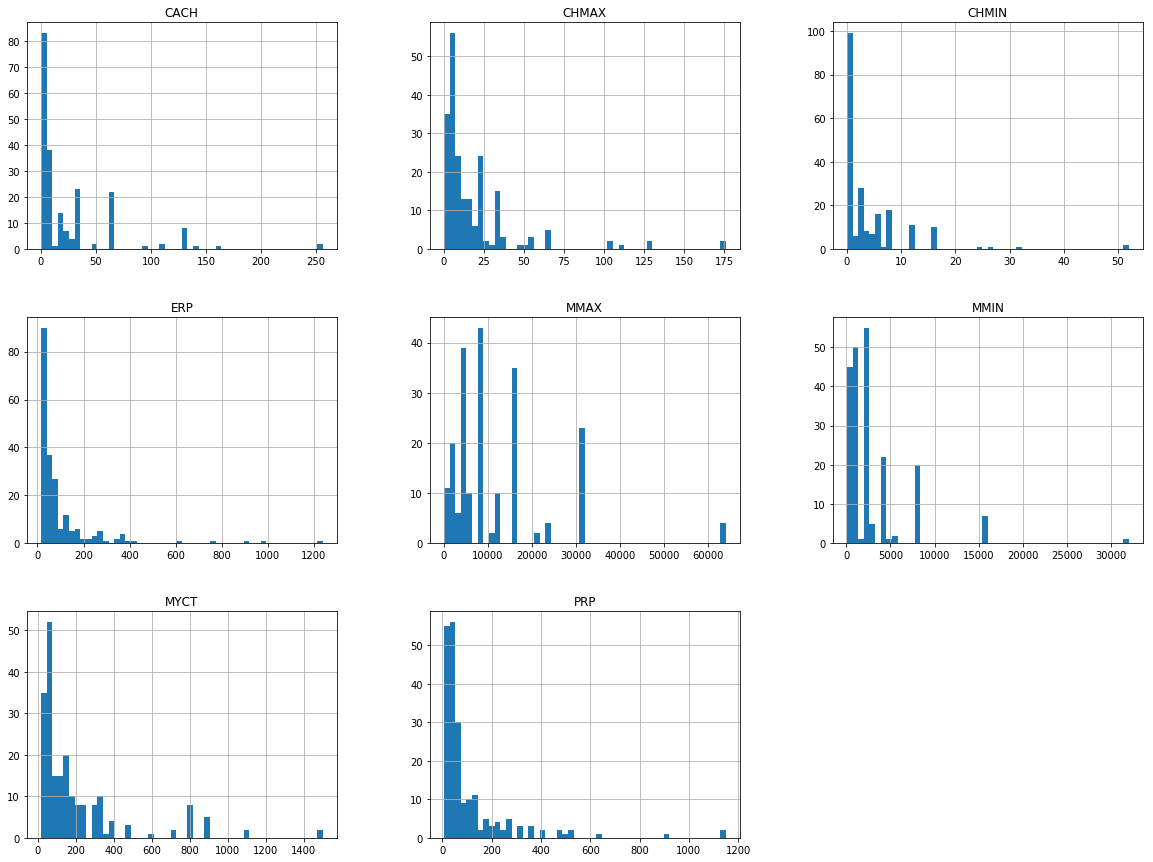

In [8]:
print("Dimensões:", dataset.shape)
print()

print("Apresentando o tipo das colunas gerado pelo read_csv:}")
print(dataset.dtypes)
print()

print("Resumo estatístico")
print(dataset.describe())
print()

dataset.hist(bins=50, figsize=(20, 15))
plt.show()

<a id='pré-processamento'></a>
## Pré-processamento
[Sumário](#inicio)


In [5]:
X = dataset.values[:, 2:-2]
Y = dataset.values[:, -2:]

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
rY = scaler.fit_transform(Y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, rY, test_size=0.2, 
                                                    random_state=0)

#print("Dimensões X_test", X_test.shape())
#print("Dimensões y_test", y_test.shape())

yEstimado = y_test[:, -1] 

y_train = y_train[:, 0]
y_test = y_test[:, 0]

/home/karlvandesman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/karlvandesman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Aplicando algoritmos de aprendizagem
[Sumário](#inicio) <br>
⬆️ [Anterior](#) | [Próximo](#avaliação_resultados) ⬇️

 - - - - - Regressão Linear - - - - -
Coeficientes: 
 [ 0.07032132  0.41424358  0.33210716  0.15585262 -0.02530475  0.23549956]
Root Mean squared error: 0.04
r2 score: 0.88

 - - - - - Regressão MLP - - - - -
 - - - - - Regressão k-NN - - - - -
RMSE value for k= 1 is=0.0324 and R2=0.9108
RMSE value for k= 2 is=0.0345 and R2=0.8990
RMSE value for k= 3 is=0.0318 and R2=0.9144
RMSE value for k= 4 is=0.0384 and R2=0.8750
RMSE value for k= 5 is=0.0363 and R2=0.8880
RMSE value for k= 6 is=0.0382 and R2=0.8765
RMSE value for k= 7 is=0.0423 and R2=0.8481
RMSE value for k= 8 is=0.0452 and R2=0.8268
RMSE value for k= 9 is=0.0478 and R2=0.8061
RMSE value for k= 10 is=0.0477 and R2=0.8075
RMSE value for k= 11 is=0.0476 and R2=0.8077
RMSE value for k= 12 is=0.0495 and R2=0.7923
RMSE value for k= 13 is=0.0511 and R2=0.7788
RMSE value for k= 14 is=0.0516 and R2=0.7739
RMSE value for k= 15 is=0.0529 and R2=0.7626
RMSE value for k= 16 is=0.0546 and R2=0.7469
RMSE value for k= 17 is=0.0559 and R2=0.7353

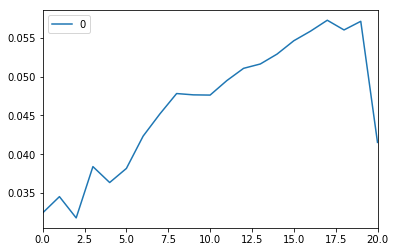

In [12]:
# Criando o objeto de regressão linear / Treinamento / Fazendo previsões
regressaoLinear = linear_model.LinearRegression()
regressaoLinear.fit(X_train, y_train)
yRegLinear = regressaoLinear.predict(X_test)

print(" - - - - - Regressão Linear - - - - -")
# Coeficientes calculados
print('Coeficientes: \n', regressaoLinear.coef_)

# Erro médio quadrático
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, yRegLinear)))

# r2 score: 1 é predição máxima
print('r2 score: %.2f' % r2_score(y_test, yRegLinear))
print()

print(" - - - - - Regressão MLP - - - - -")

# Criando o objeto de MLP / Treinamento / Fazendo previsões
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=(4,5), 
                   max_iter = 1000)
mlp=mlp.fit(X_train, y_train)
yMLP = mlp.predict(X_test)

print(" - - - - - Regressão k-NN - - - - -")

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2=r2_score(y_test,pred)
    print('RMSE value for k=', K , 'is=%.4f'% error, 'and R2=%.4f'% r2)
print()

print("Comparando com o melhor modelo kNN")

bestModel = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(yEstimado, pred)) #calculate rmse
rmse_val.append(error) #store rmse values
r2=r2_score(yEstimado, pred)
print('RMSE value for k=' , 3 , 'is=%.4f'% error, 'and R2=%.4f'% r2)
print()

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#print(" - - - - - Regressão Árvore de decisão - - - - -")
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

yArvore1 = regr_1.predict(X_test)
yArvore2 = regr_2.predict(X_test)

#print(" - - - - - Regressão Estimada (artigo) - - - - -")
#
## The mean squared error
#print("Root Mean squared error: %.2f"
#      % sqrt(mean_squared_error(Y, yEstimado)))
## Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(Y, yEstimado))
#print()

<a id='avaliação_resultados'></a>
## Avaliação dos resultados
[Sumário](#inicio) <br>
⬆️ [Anterior](#importando_bibliotecas) | [Próximo](#referências) ⬇️

*** Regressão Linear ***
Erro quadrático médio: 0.04
r2 score: 0.88

Erro quadrático médio: 0.12
r2 score: -0.31

*** Árvore 1 ***
RMSE: 0.06
R2 score: 0.66

*** Árvore 2 ***
RMSE: 0.04
R2 score: 0.84



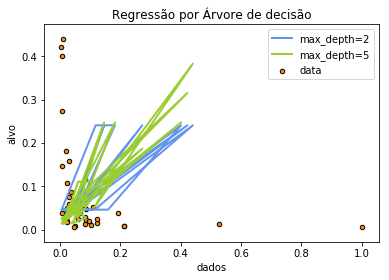

In [13]:
print("*** Regressão Linear ***")
# Erro médio quadrático
print("Erro quadrático médio: %.2f"
      % sqrt(mean_squared_error(y_test, yRegLinear)))

# r2 score: 1 é predição máxima
print('r2 score: %.2f' % r2_score(y_test, yRegLinear))
print()

# Erro médio quadrático
print("Erro quadrático médio: %.2f"
      % sqrt(mean_squared_error(y_test, yMLP)))

# r2 score: 1 é predição máxima
print('r2 score: %.2f' % r2_score(y_test, yMLP))
print()

print("*** Árvore 1 ***")
print("RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred1)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred1))
print()

print("*** Árvore 2 ***")
# The mean squared error
print("RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred2)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred2))
print()

# Plotando resultados da Árvore de decisão
plt.figure()
plt.scatter(X_test[:, 0], y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(y_test, yArvore1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(y_test, yArvore2, color="yellowgreen", label="max_depth=5", 
         linewidth=2)
plt.xlabel("dados")
plt.ylabel("alvo")
plt.title("Regressão por Árvore de decisão")
plt.legend()
plt.show()

<a id='referências'></a>
## Referências
[Sumário](#inicio)

1. 